In [2]:
# basic imports 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [3]:

#importing the csv file as a pandas dataframe while ignoring faulty lines ,
import csv

filename = './data/cases_2010.csv'

with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
    reader = csv.reader(file)
    header = next(reader)  # Get the header (first row)
    data = [row for row in reader]

cases_2010 = pd.DataFrame(data, columns=header)

disp_name_keys = pd.read_csv('./data/disp_name_key.csv')


In [4]:
#checking the number of rows in both the data frames being used 
print(cases_2010.shape[0])
disp_name_keys.shape[0]

979907


462

In [ ]:
print("cases_2010 : ",cases_2010.head())

print("disp_name_keys: ", disp_name_keys.head())

In [7]:
cases_2010_df = cases_2010[['dist_code', 'date_of_filing', 'date_of_decision', 'disp_name']]
cases_2010_df

,dist_code,date_of_filing,date_of_decision,disp_name
0,01,2010-12-13,2011-06-19,42
1,01,2010-02-25,2010-11-21,42
2,01,2010-02-25,2010-11-21,42
3,01,2010-02-25,2010-11-21,42
4,01,2010-02-25,2010-11-21,42
...,...,...,...,...
979902,23,2010-06-17,2011-01-05,4
979903,23,2010-06-11,2010-09-06,42
979904,23,2010-06-17,2011-01-28,4
979905,23,2010-06-17,2011-02-08,4


In [8]:
# Converting the date columns to datetime format
cases_2010_df.loc[:, 'date_of_filing'] = pd.to_datetime(cases_2010_df['date_of_filing'], errors='coerce')
cases_2010_df.loc[:, 'date_of_decision'] = pd.to_datetime(cases_2010_df['date_of_decision'], errors='coerce')

# Calculating the time taken for each case and add it as a new column
cases_2010_df.loc[:, 'time_taken'] = (cases_2010_df['date_of_decision'] - cases_2010_df['date_of_filing']).dt.days

# Displaying the updated DataFrame
cases_2010_df


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,dist_code,date_of_filing,date_of_decision,disp_name,time_taken
0,01,2010-12-13,2011-06-19,42,188.0
1,01,2010-02-25,2010-11-21,42,269.0
2,01,2010-02-25,2010-11-21,42,269.0
3,01,2010-02-25,2010-11-21,42,269.0
4,01,2010-02-25,2010-11-21,42,269.0
...,...,...,...,...,...
979902,23,2010-06-17,2011-01-05,4,202.0
979903,23,2010-06-11,2010-09-06,42,87.0
979904,23,2010-06-17,2011-01-28,4,225.0
979905,23,2010-06-17,2011-02-08,4,236.0


In [9]:
# Removing any empty datapoints for a cleaner data set
cases_2010_df = cases_2010_df.dropna(subset=['date_of_filing', 'date_of_decision'])
cases_2010_df

,dist_code,date_of_filing,date_of_decision,disp_name,time_taken
0,01,2010-12-13,2011-06-19,42,188.0
1,01,2010-02-25,2010-11-21,42,269.0
2,01,2010-02-25,2010-11-21,42,269.0
3,01,2010-02-25,2010-11-21,42,269.0
4,01,2010-02-25,2010-11-21,42,269.0
...,...,...,...,...,...
979901,23,2010-06-15,2011-03-11,42,269.0
979902,23,2010-06-17,2011-01-05,4,202.0
979903,23,2010-06-11,2010-09-06,42,87.0
979904,23,2010-06-17,2011-01-28,4,225.0


In [10]:
# the data types of the disp_name is being checked for both the dataframes 
# this is being done because the merge that will be done later , would not work with different dtypes 
print(cases_2010_df['disp_name'].dtype)

object


In [11]:
print(disp_name_keys['disp_name'].dtype)

int64


In [12]:
# Converting the disp_name column in cases_2010_df to int64
cases_2010_df['disp_name'] = cases_2010_df['disp_name'].astype('int64')

# Checking the data types again
print(cases_2010_df['disp_name'].dtype)  # Should be int64 now
print(disp_name_keys['disp_name'].dtype)  # Should be int64


int64
int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Merging the DataFrames on the disp_name column
merged_df = pd.merge(cases_2010_df, disp_name_keys[['disp_name', 'disp_name_s']], on='disp_name', how='left')

# Displaying the merged DataFrame
merged_df.head()


,dist_code,date_of_filing,date_of_decision,disp_name,time_taken,disp_name_s
0,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat
1,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat
2,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat
3,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat
4,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat


In [14]:
# checking if there are the required type of disposition names in the right column
merged_df['disp_name_s'].unique()

array(['referred to lok adalat', 'quash', 'disposed-otherwise',
       'disposed', 'dismissed', 'died', 'judgement', 'fine', 'compromise',
       'compounded', 'reject', 'withdrawn', 'untrace', '258 crpc',
       'abated', 'convicted', 'converted', 'acquitted', 'decided',
       'allowed', 'other', 'not press', 'ex-parte',
       'disposition var missing', 'settled', 'remanded', 'committed',
       'closed', 'transferred', 'stayed', 'probation', 'prison',
       'plea bargaining', 'partly decreed', 'procedural', 'bail refused',
       'bail order', 'bail granted', 'bail rejected',
       'disposal in lok adalat', 'plead guilty', 'otherwise', 'cancelled',
       'p.o. consign', 'sine die', 'award', 'confession'], dtype=object)

In [15]:
# since some models dont seem to be accepting objects,
#the date is being changed to a number between 1 and 365
#this should not have a significant effect on the output as 
#all of the days are still unique 

merged_df['day_of_year'] = merged_df['date_of_filing'].dt.dayofyear

In [16]:
merged_df

,dist_code,date_of_filing,date_of_decision,disp_name,time_taken,disp_name_s,day_of_year
0,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat,347
1,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat,347
2,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat,347
3,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat,347
4,01,2010-12-13,2011-06-19,42,188.0,referred to lok adalat,347
...,...,...,...,...,...,...,...
8239171,23,2010-06-17,2011-02-08,4,236.0,acquitted,168
8239172,23,2010-06-17,2011-02-08,4,236.0,acquitted,168
8239173,23,2010-06-17,2011-02-08,4,236.0,acquitted,168
8239174,23,2010-06-17,2011-02-08,4,236.0,acquitted,168


In [17]:
# importing the function for creating the training and testing sets 
from sklearn.model_selection import train_test_split

In [18]:
#creating different dataframes for the input and output 
X = merged_df[['dist_code', 'time_taken', 'day_of_year']]
y = merged_df['disp_name_s']

In [19]:
#splitting the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=42)

In [20]:
X_train

,dist_code,time_taken,day_of_year
3167735,20,1389.0,51
5595126,29,1364.0,172
3527517,21,988.0,340
7873919,15,385.0,327
6636945,35,971.0,19
...,...,...,...
6550634,35,1673.0,340
7705870,10,1807.0,11
6423388,34,873.0,62
6962611,39,1691.0,40


In [21]:
y_test.unique()

array(['disposed-otherwise', '258 crpc', 'referred to lok adalat',
       'not press', 'allowed', 'disposed', 'acquitted', 'compounded',
       'fine', 'other', 'judgement', 'transferred', 'convicted',
       'dismissed', 'quash', 'committed', 'died', 'reject',
       'disposition var missing', 'settled', 'stayed', 'converted',
       'closed', 'ex-parte', 'compromise', 'withdrawn', 'abated',
       'untrace', 'remanded', 'confession', 'disposal in lok adalat',
       'otherwise', 'cancelled', 'decided', 'partly decreed',
       'plead guilty', 'p.o. consign', 'bail granted', 'probation',
       'prison', 'award', 'plea bargaining', 'procedural', 'bail order',
       'bail refused', 'sine die'], dtype=object)

In [22]:
#import and initalizing the randomforestclassifier
#the n_estimators has been reduced as the kernel was crashing
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_estimators=2 , random_state=42 , verbose = 1)

In [24]:
# because the kernel keeps crashing when training 
# the splits are being down sampled 
from sklearn.utils import resample

X_train_downsampled, y_train_downsampled = resample(X_train, y_train, n_samples=10000, random_state=42)
rf.fit(X_train_downsampled, y_train_downsampled)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=2, random_state=42, verbose=1)

In [25]:
#predicting using the test set 
y_pred_rf = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s finished


In [27]:
#checking if the predictions are in the right shape
y_pred_rf.shape[0]


1647836

In [59]:
from joblib  import dump

rf_model = rf 
filename = './models/rf.joblib'
dump(rf_model,filename)

['./models/rf.joblib']

In [51]:
# calculating accuracy and classification reports also as a dictionary for further use 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
report_rf = classification_report(y_test, y_pred_rf)
report_rf_dict = classification_report(y_test, y_pred_rf , output_dict=True)
print(report_rf)

Accuracy: 0.15708723440924946


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

                         precision    recall  f1-score   support

               258 crpc       0.08      0.18      0.11     25924
                 abated       0.02      0.04      0.02      8909
              acquitted       0.15      0.26      0.19    150599
                allowed       0.13      0.20      0.16     37886
                  award       0.02      0.05      0.03       282
           bail granted       0.00      0.00      0.00        12
             bail order       0.00      0.00      0.00         5
           bail refused       0.00      0.00      0.00         2
              cancelled       0.01      0.01      0.01      2696
                 closed       0.02      0.03      0.02      7800
              committed       0.03      0.05      0.04      4730
             compounded       0.02      0.03      0.02     13174
             compromise       0.03      0.05      0.04     26003
             confession       0.04      0.04      0.04       905
              converted 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# changing dictionary into data frame 
# and visualizing using seaborn and matplotlib
import matplotlib.pyplot as plt 
report_rf_df = pd.DataFrame(report_rf_dict).transpose()

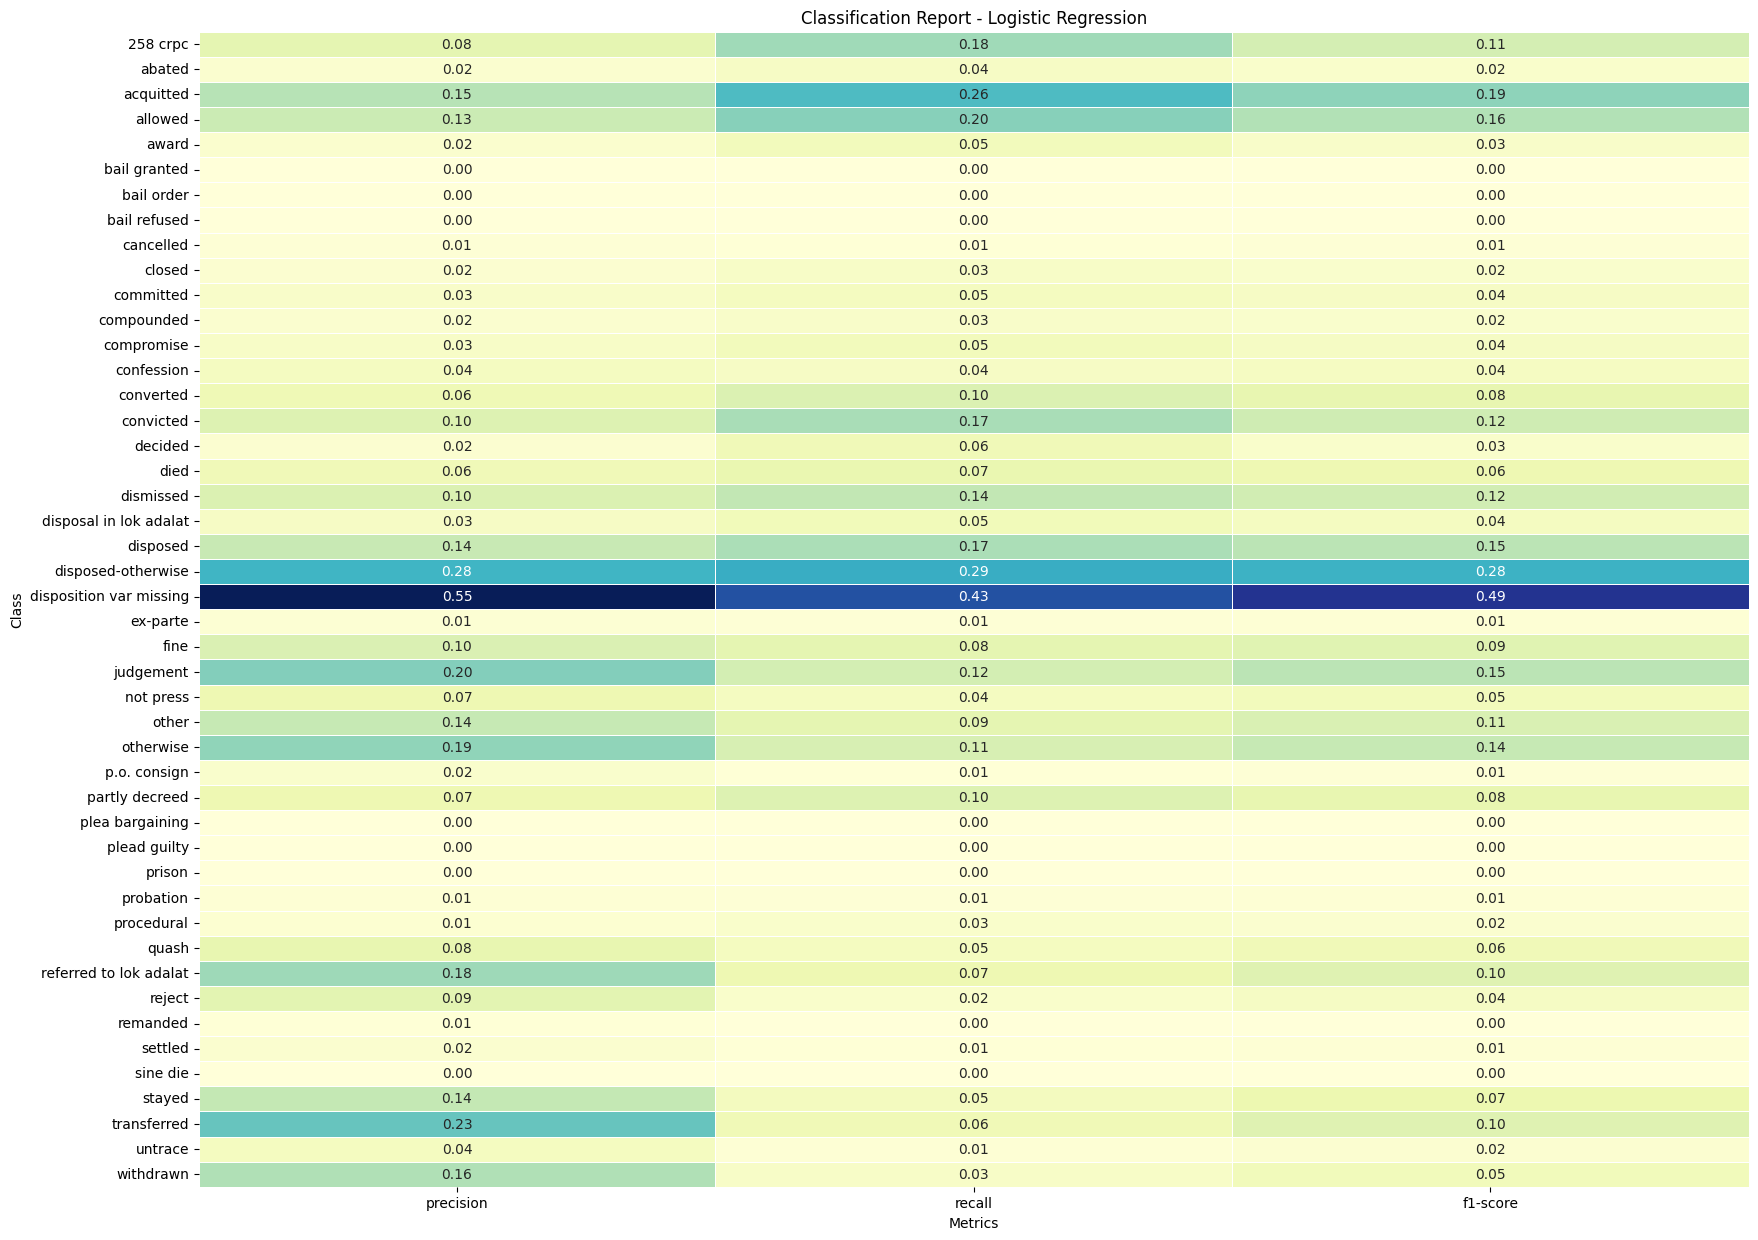

In [53]:
report_rf_df = report_rf_df[['precision', 'recall', 'f1-score']].iloc[:-3]
plt.figure(figsize=(20, 15))
sns.heatmap(report_rf_df, annot=True, cmap="YlGnBu", cbar=False, fmt='.2f', linewidths=0.5)
plt.title('Classification Report - Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


In [35]:
# logistic regression testing 
# similar steps are being followed here as random forest 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000 , random_state=42 , verbose=1)

In [37]:
lr.fit(X_train_downsampled , y_train_downsampled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          168     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73767D+04    |proj g|=  8.85259D+05

At iterate   50    f=  2.91971D+04    |proj g|=  5.72171D+04

At iterate  100    f=  2.87275D+04    |proj g|=  2.60822D+04

At iterate  150    f=  2.85930D+04    |proj g|=  3.75539D+04

At iterate  200    f=  2.85128D+04    |proj g|=  1.61061D+04

At iterate  250    f=  2.84662D+04    |proj g|=  4.31743D+03

At iterate  300    f=  2.84256D+04    |proj g|=  9.74528D+03

At iterate  350    f=  2.84034D+04    |proj g|=  5.21608D+03

At iterate  400    f=  2.83843D+04    |proj g|=  2.31364D+03

At iterate  450    f=  2.83703D+04    |proj g|=  7.18190D+03

At iterate  500    f=  2.83529D+04    |proj g|=  7.21430D+03

At iterate  550    f=  2.83401D+04    |proj g|=  7.65585D+03

At iterate  600    f=  2.83275D+04    |proj g|=  5.57967D+03

At iterate  650    f=  2.8

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s finished


LogisticRegression(max_iter=1000, random_state=42, verbose=1)

In [38]:
y_pred_lr = lr.predict(X_test)

In [42]:
y_pred_lr.shape[0]

1647836

In [60]:
lr_model = lr
filename_lr = './models/lr.joblib'
dump(lr_model,filename_lr)

['./models/lr.joblib']

In [54]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
report_lr = classification_report(y_test , y_pred_lr)
report_lr_dict = classification_report(y_test, y_pred_lr, output_dict= True)
print(report_lr)

Accuracy: 0.20025415150536827


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

                         precision    recall  f1-score   support

               258 crpc       0.06      0.01      0.01     25924
                 abated       0.00      0.00      0.00      8909
              acquitted       0.17      0.44      0.25    150599
                allowed       0.00      0.00      0.00     37886
                  award       0.00      0.00      0.00       282
           bail granted       0.00      0.00      0.00        12
             bail order       0.00      0.00      0.00         5
           bail refused       0.00      0.00      0.00         2
              cancelled       0.00      0.00      0.00      2696
                 closed       0.00      0.00      0.00      7800
              committed       0.00      0.00      0.00      4730
             compounded       0.00      0.00      0.00     13174
             compromise       0.00      0.00      0.00     26003
             confession       0.00      0.00      0.00       905
              converted 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
import matplotlib.pyplot as plt 
report_lr_df = pd.DataFrame(report_lr_dict).transpose()

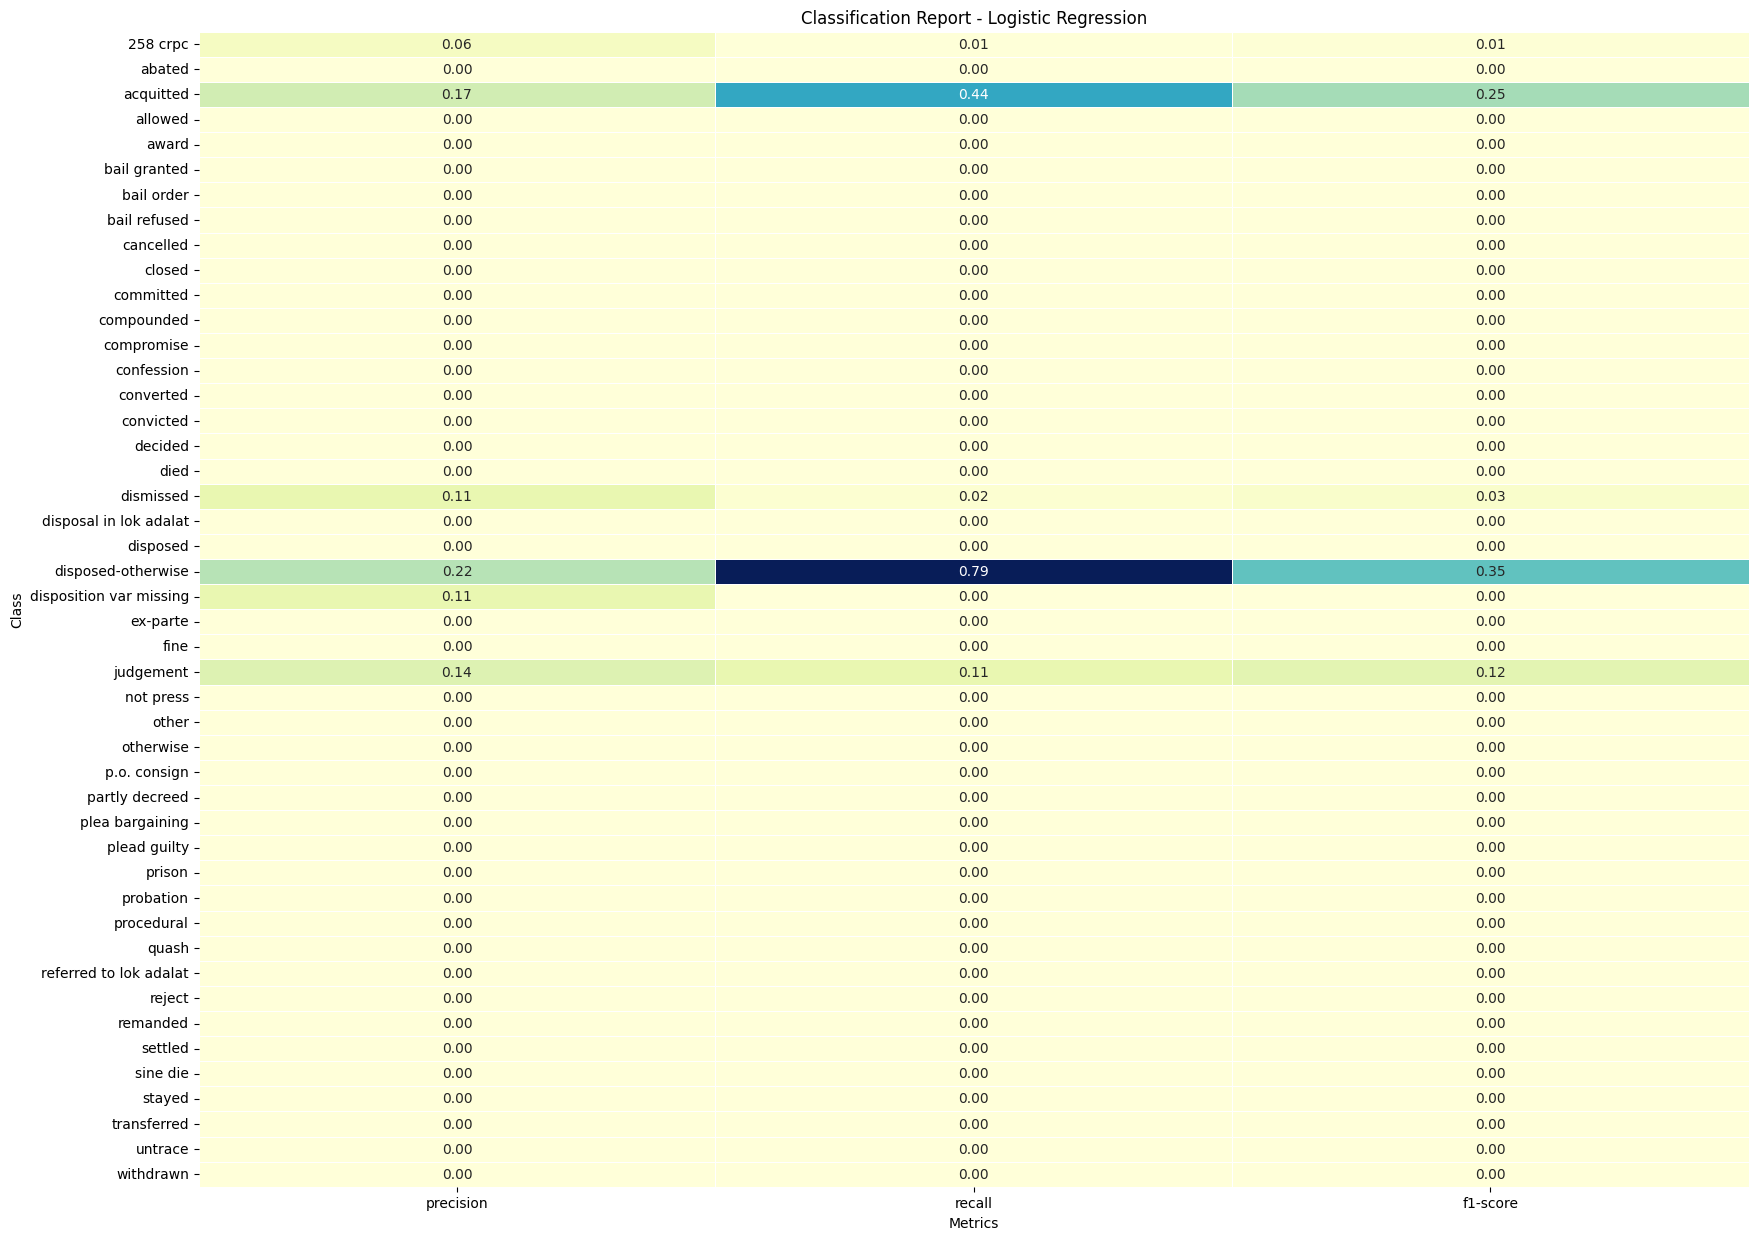

In [56]:
report_lr_df = report_lr_df[['precision', 'recall', 'f1-score']].iloc[:-3]
plt.figure(figsize=(20, 15))
sns.heatmap(report_lr_df, annot=True, cmap="YlGnBu", cbar=False, fmt='.2f', linewidths=0.5)
plt.title('Classification Report - Logistic Regression')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()
